In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')

data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data = data.dropna()

X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = data['Survived'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

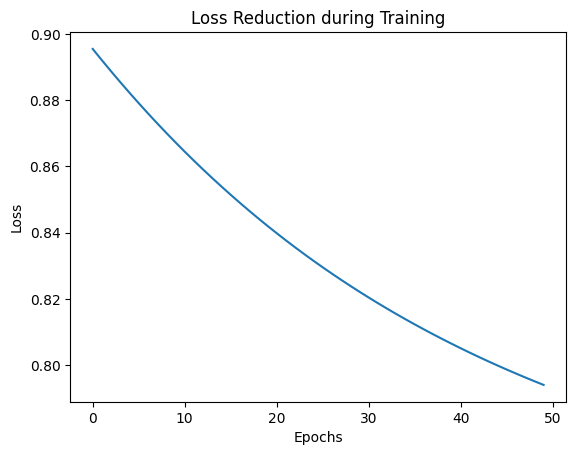

   Actual  Predicted
0       0          1
1       0          0
2       1          1
3       0          0
4       1          1


In [6]:
def sigmoid_derivative(x):
    return x * (1 - x)

def relu_derivative(x):
    return (x > 0).astype(float)

def backprop(X, y, a1, a2):
    m = X.shape[0]
    dz2 = a2 - y.reshape(-1, 1)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2) / m

    dz1 = np.dot(dz2, W2.T) * relu_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1) / m

    return dW1, db1, dW2, db2

learning_rate = 0.01
epochs = 50
losses = []

for epoch in range(epochs):
    a1, a2 = forward(X_train)
    loss = -np.mean(y_train * np.log(a2) + (1 - y_train) * np.log(1 - a2))
    losses.append(loss)

    dW1, db1, dW2, db2 = backprop(X_train, y_train, a1, a2)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Reduction during Training')
plt.show()

_, test_predictions = forward(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})
print(comparison.head())